In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('reload_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../deepSfm'))
if module_path not in sys.path:
    sys.path.append(module_path)
print("module path: ", module_path)

module path:  /home/yoyee/Documents/deepSfm


In [3]:
from KITTI_keypoint_distribution_func import *
from KITTI_keypoint_distribution_func import Val_model_kitti

module path:  /home/yoyee/Documents/deepSfm


In [4]:
# def main():
parser = argparse.ArgumentParser(description='Foo')
# parser.add_argument('config', type=str)
parser.add_argument("--dataset_dir", type=str, default="/data/kitti/odometry", help="path to dataset")   
parser.add_argument("--num_threads", type=int, default=1, help="number of thread to load data")
parser.add_argument("--img_height", type=int, default=376, help="number of thread to load data")
parser.add_argument("--img_width", type=int, default=1241, help="number of thread to load data")
# parser.add_argument("--img_height", type=int, default=370, help="number of thread to load data")
# parser.add_argument("--img_width", type=int, default=1226, help="number of thread to load data")
parser.add_argument('--dump', action='store_true', default=False)
parser.add_argument("--with_X", action='store_true', default=False,
                    help="If available (e.g. with KITTI), will store visable rectified lidar points ground truth along with images, for validation")
parser.add_argument("--with_pose", action='store_true', default=True,
                    help="If available (e.g. with KITTI), will store pose ground truth along with images, for validation")
parser.add_argument("--with_sift", action='store_true', default=False,
                    help="If available (e.g. with KITTI), will store SIFT points ground truth along with images, for validation")
parser.add_argument("--dump_root", type=str, default='dump', help="Where to dump the data")

args = parser.parse_args('--dump --with_pose --with_X     --dataset_dir /data/kitti/odometry     --dump_root /data/kitti/odometry/dump_tmp'.split())
print(args)



#### load config ####

from utils.utils import loadConfig
# filename = '../deepSfm/configs/superpoint_coco_test.yaml'
filename = '../deepSfm/configs/superpoint_kitti_test_heatmap.yaml'
# filename = args.config
config = loadConfig(filename)
print("config path: ", filename)
print("config: ", config)

# load kitti data




Namespace(dataset_dir='/data/kitti/odometry', dump=True, dump_root='/data/kitti/odometry/dump_tmp', img_height=376, img_width=1241, num_threads=1, with_X=True, with_pose=True, with_sift=False)
config path:  ../deepSfm/configs/superpoint_kitti_test_heatmap.yaml
config:  {'data': {'name': 'patches_dataset', 'dataset': 'kitti', 'export_folder': 'train', 'alteration': 'all', 'preprocessing': None}, 'model': {'name': 'SuperPointNet_gauss2', 'params': {}, 'batch_size': 1, 'detection_threshold': 0.015, 'nms': 4, 'nn_thresh': 1.2, 'subpixel': {'enable': False, 'params': {'subpixel_channel': 2}}, 'pretrained': '../deepSfm/logs/superpoint_kitti_heat2_0/checkpoints/superPointNet_50000_checkpoint.pth.tar'}, 'evaluations': {'params': {'ransac_thresh': 0.1}, 'random_frame': True, 'starting_frame': 500, 'frame_diff': 1, 'round': False, 'block_center': {'enable': False, 'size': [100, 200]}, 'iter_max': 3, 'five_point': False, 'use_est_E': False, 'other_settings': 'use gt E for % of correspondence inli

2019-05-20 21:29:06 descartes root[307610] INFO +++ Dumping as npy
  0%|          | 5/1101 [00:00<00:22, 47.99it/s]

[Path('/data/kitti/odometry/sequences/00'), Path('/data/kitti/odometry/sequences/01'), Path('/data/kitti/odometry/sequences/02'), Path('/data/kitti/odometry/sequences/03'), Path('/data/kitti/odometry/sequences/04'), Path('/data/kitti/odometry/sequences/05'), Path('/data/kitti/odometry/sequences/06'), Path('/data/kitti/odometry/sequences/07'), Path('/data/kitti/odometry/sequences/08')]
[Path('/data/kitti/odometry/sequences/09'), Path('/data/kitti/odometry/sequences/10')]


100%|██████████| 1101/1101 [00:16<00:00, 67.02it/s]
2019-05-20 21:29:23 descartes root[307610] INFO Getting X.../data/kitti/odometry/sequences/01
100%|██████████| 1101/1101 [00:39<00:00, 27.76it/s]


1101
(376, 1241, 3)
[376, 1241] (1.0, 1.0)
Reading from input list of param_list=[K, im_shape].


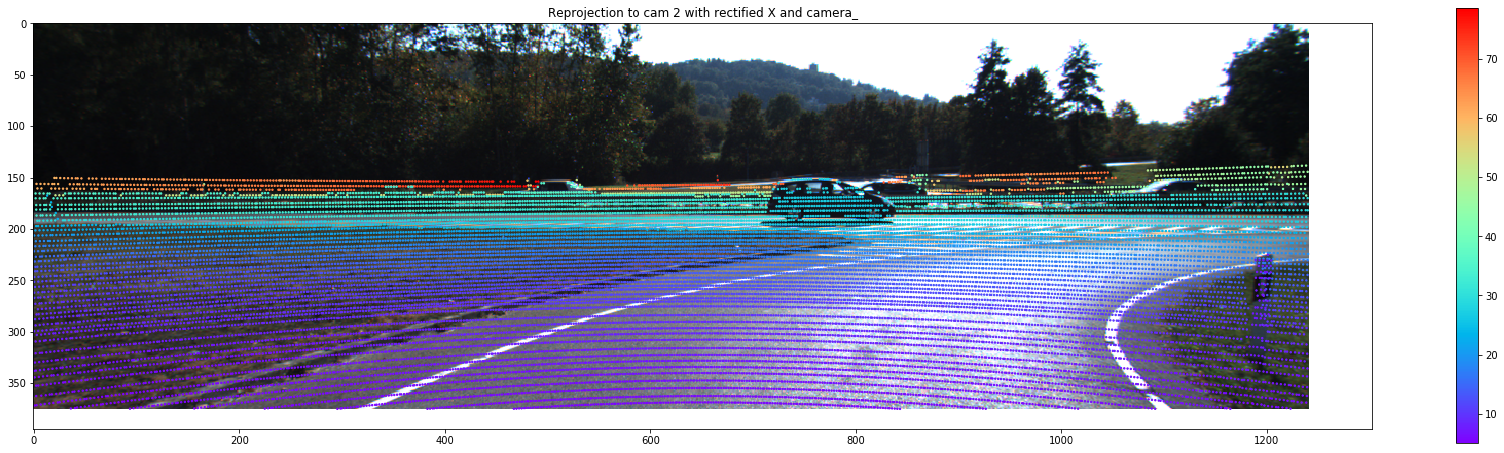

[[718.856        0.         607.1928      45.38225   ]
 [  0.         718.856      185.2157      -0.1130887 ]
 [  0.           0.           1.           0.00377976]]


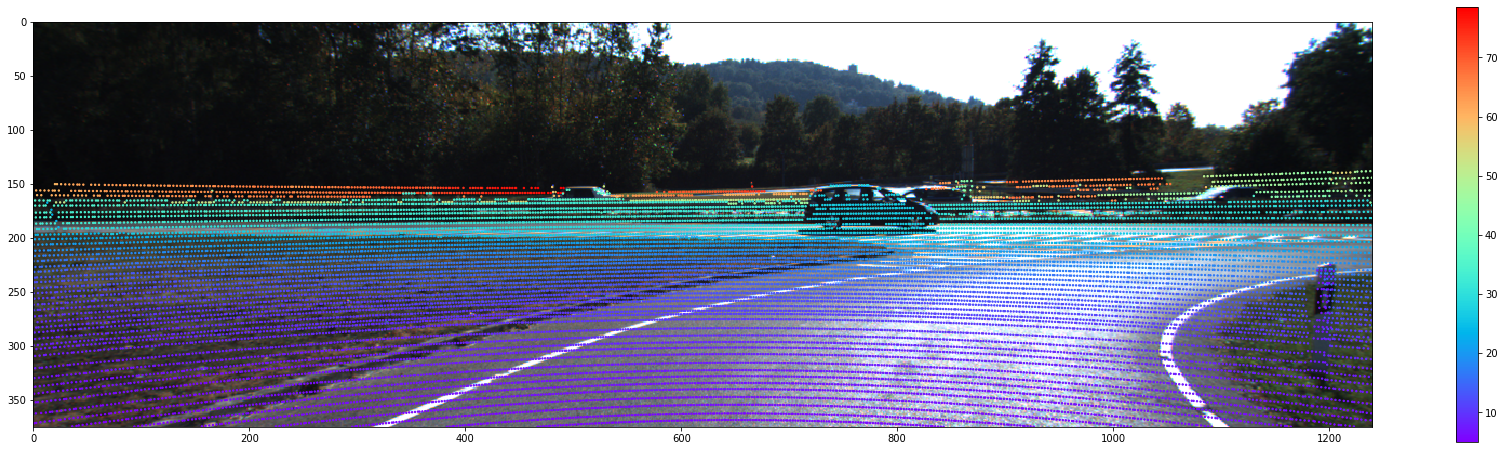

[[-0.00000002  0.        ]
 [-0.00000001  0.        ]
 [-0.00000001  0.        ]
 ...
 [-0.00000015 -0.        ]
 [-0.00000015 -0.        ]
 [-0.00000014 -0.        ]]


In [5]:
data_loader, scene_data = loadKitti(args)

module path:  /home/yoyee/Documents/deepSfm


module path:  /home/yoyee/Documents/deepSfm
Recfitying delta_Rtij to cam 02.
Reading from input list of param_list=[K, im_shape].
Reading from input list of param_list=[K, im_shape].


2019-05-20 21:46:21 descartes root[307610] INFO => creating model: SuperPointNet_gauss2


>>>>>>>>>>>>>>>> Between frame 23 and 26: 
The rotation angle (degree) 7.1063, and translation angle (degree) 5.4600
====================  start  ====================
2019-05-20 21:46:21.741276
config path:  ../deepSfm/configs/superpoint_kitti_test_heatmap.yaml
{'dsac': [], 'opencv_Rt': [], 'epi_dist_mean': [], 'frame_arr': []}


2019-05-20 21:46:21 descartes root[307610] INFO successfully load pretrained model from: ../deepSfm/logs/superpoint_kitti_heat2_0/checkpoints/superPointNet_50000_checkpoint.pth.tar


==> Successfully loaded pre-trained network.
config:  {'data': {'name': 'patches_dataset', 'dataset': 'kitti', 'export_folder': 'train', 'alteration': 'all', 'preprocessing': None}, 'model': {'name': 'SuperPointNet_gauss2', 'params': {}, 'batch_size': 1, 'detection_threshold': 0.015, 'nms': 4, 'nn_thresh': 1.2, 'subpixel': {'enable': False, 'params': {'subpixel_channel': 2}}, 'pretrained': '../deepSfm/logs/superpoint_kitti_heat2_0/checkpoints/superPointNet_50000_checkpoint.pth.tar'}, 'evaluations': {'params': {'ransac_thresh': 0.1}, 'random_frame': True, 'starting_frame': 500, 'frame_diff': 1, 'round': False, 'block_center': {'enable': False, 'size': [100, 200]}, 'iter_max': 3, 'five_point': False, 'use_est_E': False, 'other_settings': 'use gt E for % of correspondence inliers'}, 'front_end_model': 'Val_model_heatmap', 'feature_mode': 2, 'save': {'enable': False, 'path': ''}, 'pretrained': '../deepSfm/logs/superpoint_coco40_2/checkpoints/superPointNet_170000_checkpoint.pth.tar', 'csv_f

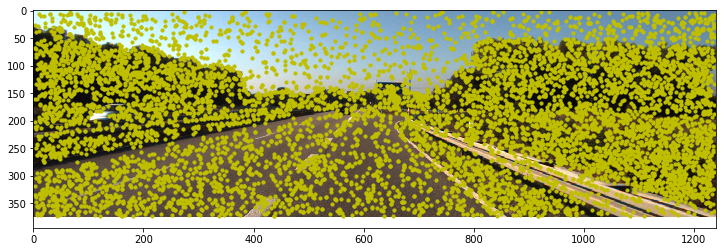

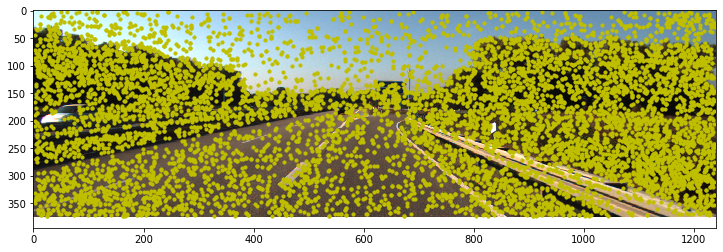

# good points: 1596/(7976, 8031)


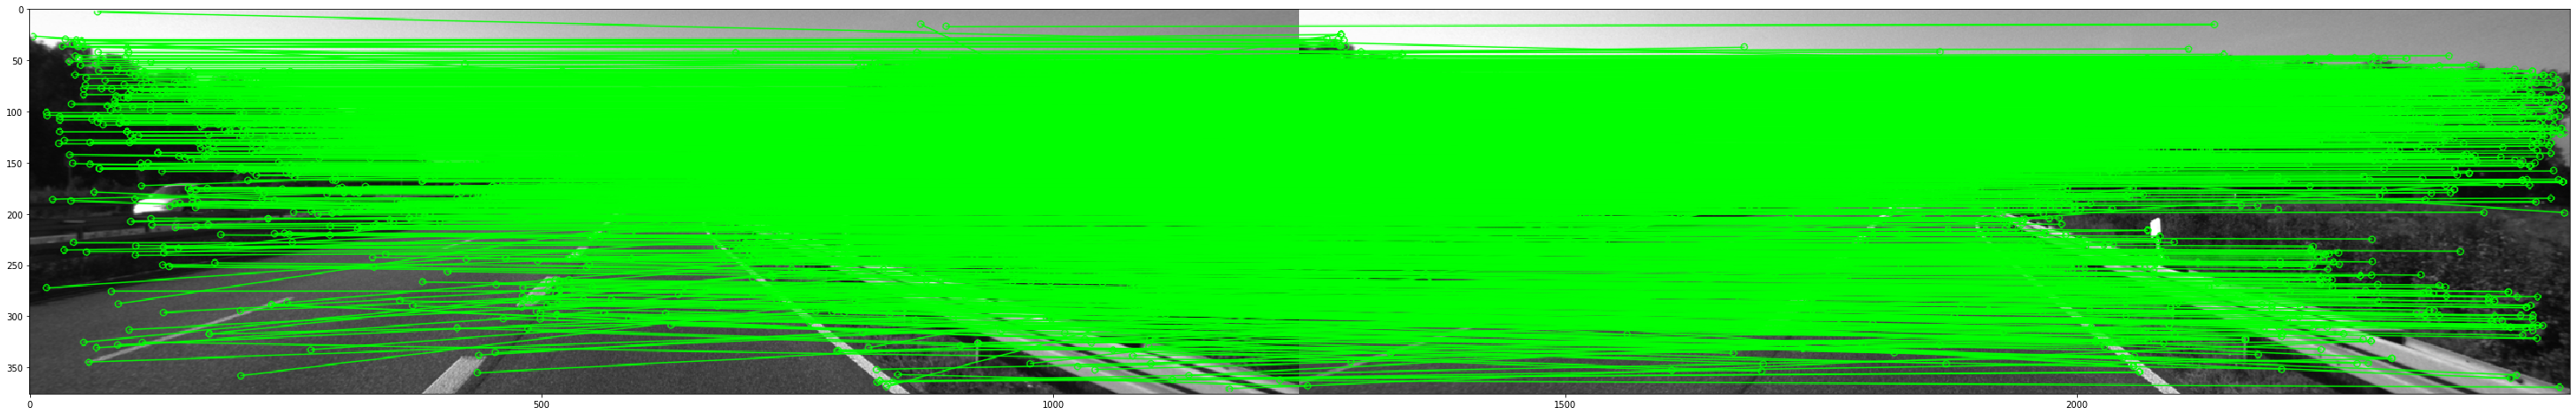

x1: some points:  [[677.73576629 136.95975912]
 [505.96845853 261.02203631]
 [546.05748534 224.15410852]
 [899.99009168 181.76592946]
 [106.83844137 188.10957742]]
img1_rgb_np:  (376, 1241, 3)
points used for RANSAC


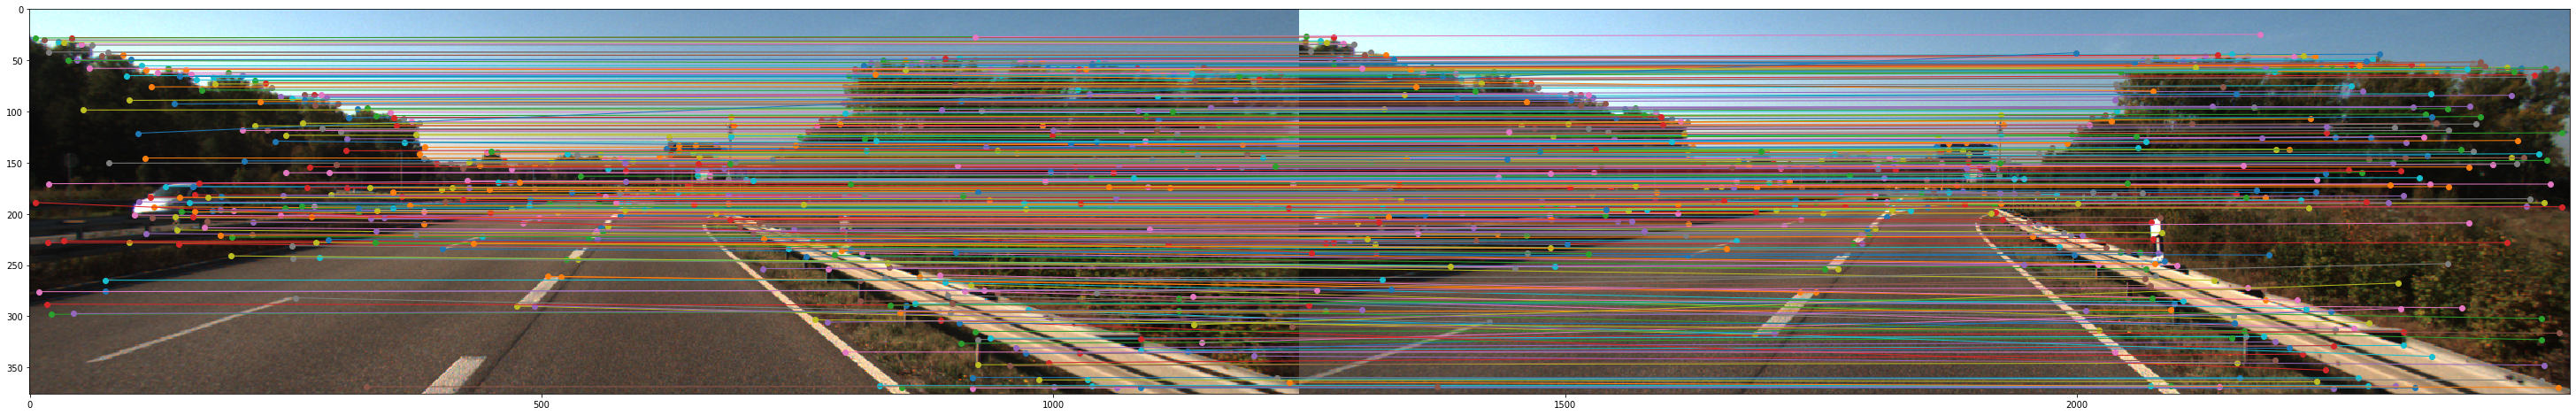

pts_f:  (65, 2)
pts_f min:  [ 5.54273927 27.74292552]
pts_f max:  [380.41800117 123.09299159]
pts_f mean:  [190.39148769  77.84684509]
pts_f:  (15, 2)
pts_f min:  [685.16423988  52.56017554]
pts_f max:  [821.84278643 123.76878381]
pts_f mean:  [771.22143583  93.2635201 ]
pts_f:  (65, 2)
pts_f min:  [828.0259409   26.84066629]
pts_f max:  [1222.12227964  123.13933325]
pts_f mean:  [1033.01417506   72.09700175]
pts_f:  (83, 2)
pts_f min:  [  5.34430289 126.53197336]
pts_f max:  [411.28387761 243.19849062]
pts_f mean:  [240.07444011 190.40163174]
pts_f:  (143, 2)
pts_f min:  [423.27484202 126.3621254 ]
pts_f max:  [817.41800451 244.40693712]
pts_f mean:  [617.47750138 179.66468824]
pts_f:  (51, 2)
pts_f min:  [826.57173467 128.65176177]
pts_f max:  [1233.71034026  247.39215064]
pts_f mean:  [1058.77902133  166.48552458]
pts_f:  (8, 2)
pts_f min:  [  8.93338251 264.70191991]
pts_f max:  [329.15884352 368.77036738]
pts_f mean:  [103.18311496 293.82955669]
pts_f:  (11, 2)
pts_f min:  [475.49

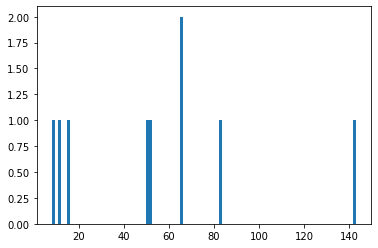

factor:  1
geo_dists:  (9,)
x1:  (9, 2)


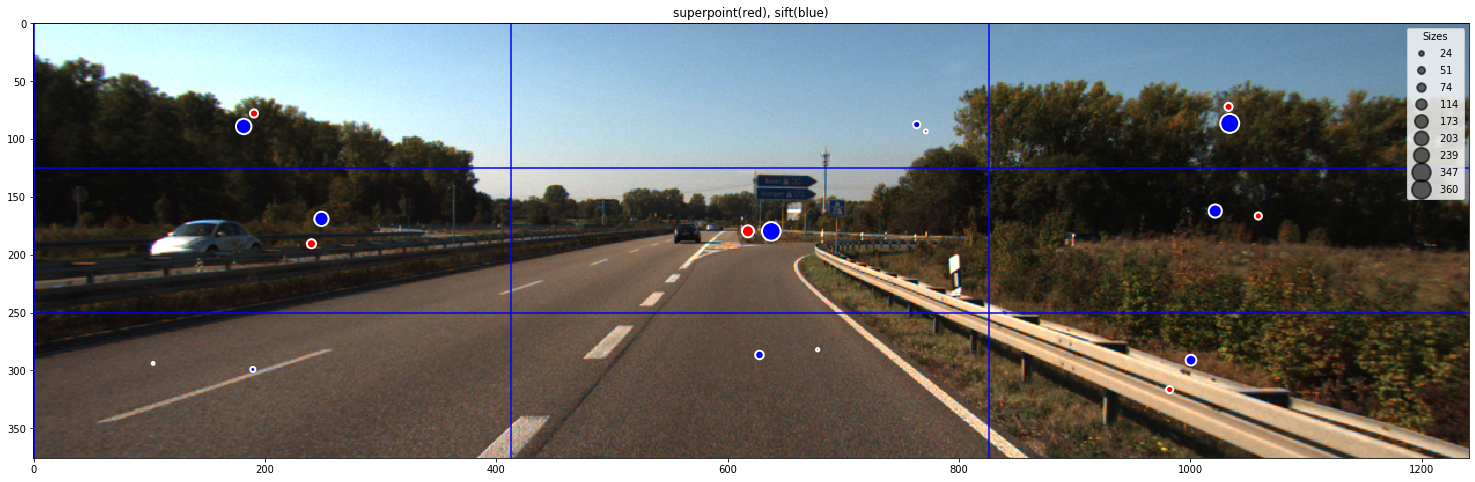

====================  start a pair  ====================
iter:  2
Recfitying delta_Rtij to cam 02.
Reading from input list of param_list=[K, im_shape].
Reading from input list of param_list=[K, im_shape].
>>>>>>>>>>>>>>>> Between frame 477 and 478: 
The rotation angle (degree) 0.1004, and translation angle (degree) 0.9246
heatmap:  (380, 1244)
pts:  [[ 690.98352444  303.84065914 1055.21314573  868.11987233 1177.29386544]
 [ 152.147753    226.86360264  184.07207084  212.14503026  171.11925578]
 [   0.64106458    0.59029317    0.55794162    0.54998094    0.48549062]]


In [ ]:
# # Get ij

i = 23
delta_ij = 3
j = i + delta_ij
X_rect_i, X_rect_i_vis, delta_Rtij, delta_Rtij_inv, img1_rgb, img2_rgb = get_ij(i, j, data_loader, scene_data, visualize=False)

# write to files
if config['save']['enable']:
    f = open(config['save']['path'], "a")
else: 
    f = None
print("="*50, file=f)
print("="*20, " start ", "="*20, file=f)
print("="*50, file=f)
import datetime
print(datetime.datetime.now(), file=f)


print("config path: ", filename, file=f)

error_names = ['dsac', 'opencv_Rt', 'epi_dist_mean', 'frame_arr']
errors = {error_name:[] for error_name in error_names}
print(errors)

val_agent = Val_model_kitti(data_loader, scene_data, args, config)
val_agent.load_model()
val_agent.sift_enable()
val_agent.run(visualize=True)


In [ ]:
import matplotlib.pyplot as plt
plt.axhline(y=0.5, color='r', linestyle='-')
plt.axvline(x=1.5, color='r', linestyle='-')
plt.show()

In [ ]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [ ]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [ ]:

err = errors['epi_dist_mean']
thd_1, thd_2 = 0.1, 1
accs, num_corrs = [], []
if config['evaluations']['five_point']:
    tag = '5_point'
else:
    tag = '8_point'
    
print("="*20, " ", tag, " ", "="*20, file=f)
for e in err:
    errs = output_epi_dist_mean_est_5p(e, thd_1, thd_2, tag=tag, file=f)
#     print("error: ", e)

    accs.append(np.array(errs))
    num_corrs.append(e.shape[0])
accs = np.array(accs)
accs_mean = accs.mean(axis=0)
num_corrs_mean = np.array(num_corrs).mean()
print("average number of correspondences: %.2f"%num_corrs_mean, file=f)
print("percentage of inliers over %d frames, thd=(%.2f, %.2f): (%.2f, %.2f)"%\
      (accs.shape[0], thd_1, thd_2, accs_mean[0], accs_mean[1]), file=f)


In [ ]:
tag = 'opencv_Rt'
errors_Rt = np.array(errors['opencv_Rt'])
print("="*20, " ", tag, " ", "="*20, file=f)
for e in errors_Rt:
    print('error_R = %.4f, error_t = %.4f'%(e[0], e[1]), file=f)

thds = np.array([0.1, 0.5, 1, 2, 5, 10])

# print("errors_Rt: ", errors_Rt)
rt_inliers = output_Rt_est(errors_Rt, thds, tag=tag, file=f, verbose=True)

# print('length: ', len(dsac_errors))
# print('DSAC:'); get_mean_std(dsac_errors)
# print('OpenCV 5-point:'); get_mean_std(opencv_5point_errors)
# print('OpenCV 8-point:'); get_mean_std(opencv_8point_errors)



In [ ]:
print("="*20, "   end   ", "="*20, file=f)
print("="*50, file=f)
if f is not None:
    f.close()
    f=None

## Test opencv and inlier ration

In [ ]:
scene_data['N_frames']
def get_shuffle_arr(num):
    arr = np.arange(num)
    np.random.shuffle(arr)
    return arr

arr = get_shuffle_arr(10)
print("arr: ", arr)
# print("arr shift: ", arr.roll(1))
ind = 5
arr = np.concatenate((arr[ind:], arr[:ind]), axis=0)
print("arr: ", np.array(arr))

In [ ]:

from IPython.display import clear_output
sys.path.append('/home/ruizhu/Documents/Projects/kitti_instance_RGBD_utils/deepSfm_ori')
# from deepSfm.train_good_utils import val_rt
from KITTI_5_RANSAC_sample_twoFrame_odo_eva import val_rt

debug = False

# %reload_ext autoreload
%autoreload 2
delta_i = 1
# i = np.random.randint(N_frames-delta_i)
i = 724

np.set_printoptions(precision=8, suppress=True)
count = 0

K= scene_data['calibs']['K'].astype(np.float)
while i + delta_i < scene_data['N_frames']:
#     clear_output()
    j = i + delta_i

    # Get two frames
    print(i, j)
    X_rect_i, X_rect_i_vis, delta_Rtij, delta_Rtij_inv, img1_rgb, img2_rgb = get_ij(i, j, data_loader, scene_data, visualize=False)

    E_gt_th, F_gt_th = utils_F._E_F_from_Rt(delta_Rtij[:, :3], delta_Rtij[:, 3:4], K)    
    F_gt = F_gt_th.numpy()
    E_gt = E_gt_th.numpy()
    E_gt_th_inv, F_gt_th_inv = utils_F._E_F_from_Rt(delta_Rtij_inv[:, :3], delta_Rtij_inv[:, 3:4], K)    
    F_gt_inv = F_gt_th_inv.numpy()
    R2s, t2s, M2s = utils_F._get_M2s(E_gt_th)

    img1_rgb_np, img2_rgb_np = np.array(img1_rgb), np.array(img2_rgb)
    img1, img2 = utils_opencv.PIL_to_gray(img1_rgb), utils_opencv.PIL_to_gray(img2_rgb)

#     # Keypoint detection and matching with SIFT
    x1_all, kp1, des1 = utils_opencv.SIFT_det(img1, img1_rgb, visualize=False)
    if debug:
        print("x1_all: ", x1_all.shape)
        print("kp1: ", len(kp1))
        print("kp1: ", kp1)
        print("des1: ", des1.shape)
    
    x2_all, kp2, des2 = utils_opencv.SIFT_det(img2, img2_rgb, visualize=False)
    x1, x2, _, _ = utils_opencv.KNN_match(des1, des2, x1_all, x2_all, kp1, kp2, img1_rgb, img2_rgb, visualize=False, if_ratio_test=True)
    
    # OpenCV results
    ## 5 point
    five_point = False
    M, error_Rt_opencv, mask_in, E_return = utils_opencv.recover_camera_opencv(K, x1, x2, delta_Rtij_inv, five_point=five_point, threshold=0.01, show_result=False)
    if five_point:
        E_recover_opencv = E_return
        F_recover_opencv = utils_F.E_to_F_np(E_recover_opencv, K)
    else:
        E_recover_opencv, F_recover_opencv = E_return[0], E_return[1]
    
    error_Rt_est_opencv, epi_dist_mean_opencv, _, _, _, _, _, _ = val_rt(0, K, x1, x2, E_recover_opencv, E_gt, F_recover_opencv, F_gt, utils_misc.Rt_pad(delta_Rtij), five_point=False, if_opencv=False)
#     epi_dist_mean_opencv, _, _ = utils_F.epi_distance_np(F_recover_opencv, x1, x2, if_homo=False)
#     M, error_Rt_5point, mask2, E_recover = utils_opencv.recover_camera_opencv(K, x1, x2, delta_Rtij_inv, five_point=True, threshold=0.01)

    F_gt = F_gt_th.numpy()
    F_gt = F_gt/F_gt[2, 2]
    F_est = F_recover_opencv/F_recover_opencv[2, 2]
    print(F_gt)
    print(F_est)
    
    print('----- est F epi dist ratio:')
    print('%.4f, %.4f'%(np.sum(epi_dist_mean_opencv<0.1)/epi_dist_mean_opencv.shape[0], np.sum(epi_dist_mean_opencv<1.)/epi_dist_mean_opencv.shape[0]))
    
    epi_dist_mean_gt, _, _ = utils_F.epi_distance_np(F_gt, x1, x2, if_homo=False)
    print('----- gt F epi dist ratio:')
    print('%.4f, %.4f'%(np.sum(epi_dist_mean_gt<0.1)/epi_dist_mean_gt.shape[0], np.sum(epi_dist_mean_gt<1.)/epi_dist_mean_gt.shape[0]))
    
    print('----- est F (r, t) error:')
    print('%.4f, %.4f'%(error_Rt_est_opencv[0], error_Rt_est_opencv[1]))
    
    if np.sum(mask_in)>30:
        utils_vis.show_epipolar_rui_gtEst(x1[mask_in, :][:30], x2[mask_in, :][:30], img1_rgb, img2_rgb, F_gt, F_recover_opencv, im_shape=img1_rgb.shape, title_append='OpenCV 5-point' if five_point else 'OpenCV 8-point')
    else:
        utils_vis.show_epipolar_rui_gtEst(x1[mask_in, :], x2[mask_in, :], img1_rgb, img2_rgb, F_gt, F_recover_opencv, im_shape=img1_rgb.shape, title_append='OpenCV 5-point' if five_point else 'OpenCV 8-point')

    
#     break
    
    i = i+delta_i
    count += 1
    
    if count > 2:
        break

In [ ]:
print("x1 shape: ", x1.shape)
pts_arr = x1
def to_kpt(pt, size=1): 
    return cv2.KeyPoint(pt[0], pt[1], size) 
kp1 = [to_kpt(pts_arr[i,:]) for i in range(pts_arr.shape[0])]
print(len(kp1))
